In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from datetime import time
plt.rcParams ['font.sans-serif'] ='SimHei'               #显示中文
plt.rcParams ['axes.unicode_minus'] = False               #显示负号

# 读取数据

In [2]:
#### 时间设定
start='2023-02-01'; end='2024-01-31'

In [3]:
activities = pd.read_csv('活动表处理后.csv',dtype={0:str},parse_dates=['开始时间','结束时间'])
activities =activities[(activities['开始时间']>start) & (activities['结束时间']<end)]
commodity=pd.read_csv('商品表处理后.csv',dtype={0:str,1:str})
commodity=commodity[[col for col in commodity.columns if 'Unnamed' not in col]]
print(activities.columns)
commodity.head(2)

Index(['活动id', '活动名称', '开始时间', '结束时间', '说明', '活动类型'], dtype='object')


,id,商品编码,商品名称,品牌名称,规格,单位,生产厂家,批准文号,库存数量,疾病分类统一,商品类别,医保类型,工业采购价,客户采购价格,建议零售价,工业毛利额,客户毛利额,客户毛利率,上架日期,最后一次采购日期
0,52a54f93-13c9-430b-9e39-7a35de3d388f,6970878583019671591,鑫玺****罗汉果糖,蜀汉本草,2.5g*16片,盒,鑫玺****有限公司,国食健注G20150362,0,保健食品,预包装保健食品,非医保,2.3,3.69,12.8,1.39,9.11,0.711719,2021-10-09,2023-12-11
1,643eb938-3b79-4ce3-911e-e355b31f6bbb,6970878583019671976,金银****含片,蜀汉本草,2.5g*16片,盒,鑫玺****有限公司,国食健注G20140205,22601,保健食品,预包装保健食品,非医保,2.3,3.69,12.0,1.39,8.31,0.692500,2021-10-09,2024-01-10


In [4]:
customers=pd.read_csv('../data/customers.csv',dtype={0:str},parse_dates=['注册日期'])
customers=customers[[col for col in customers.columns if 'Unnamed' not in col]]
customers=customers[customers['是否样本']==1]   ## 筛选样本
customers_new=customers['客户id'].to_frame()
customers.head(2)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,客户id,客户名称,客户类型(新增),推广经理,当前状态,连锁标记(更新),客户所在省,客户所在市,客户所在县,是否医保店,客户等级,位置类型(更新),注册日期,是否有过投诉,是否连锁(新增),行政区划,是否样本
0,7081090359123820544,桥西****结合诊所,诊所,平志红,启用,NaN,河北省,石家庄市,桥西区,是,60万-70万,城乡店,2023-07-02 10:05:01.913,否,不连锁,市区,1
1,6970904116784796290,武胜****生服务站,卫生服务站,杨茜,启用,NaN,四川省,广安市,武胜县,是,50万-60万,院边店,2021-03-03 14:11:28.360,是,不连锁,县,1


In [5]:
orders=pd.read_csv('订单表处理后_300w样本.csv',
#orders=pd.read_csv('../data/orders_2023.csv',nrows=5000000   ,
                 parse_dates={'订单创建日期时间': ['订单创建日期', '订单创建时间'],
                              '订单支付日期时间': ['订单支付日期', '订单支付时间']},
                 dtype={'客户id': str, '订单号': str, '商品编码': str, '活动id': str})
## 筛选样本和 只取设定里面的时间
orders=orders[orders['是否样本']==1]
orders = orders[(orders['订单创建日期时间']>start) & (orders['订单创建日期时间']<end)]
orders = orders[[col for col in orders.columns if 'Unnamed' not in col]].sort_values('订单创建日期时间').reset_index(drop=True)
print(orders.shape)
orders.head(2)

(2539023, 21)


,订单创建日期时间,订单支付日期时间,客户id,订单号,商品编码,数量,商品原价,成交单价,实付金额,折扣金额,...,退款金额,订单总计运费,支付方式,活动id,是否活动,活动类型,支付状态,实际配送时长,是否样本,实际配送时长(更新)
0,2023-02-01 00:04:04,2023-02-01 00:04:21,6970904171633709202,BL2302030004036294606,7018092099601956864,5,11.09,11.09,55.45,0.0,...,0.0,0.0,微信,0,否,无,部分退款,3.0,1,3.0
1,2023-02-01 00:04:04,2023-02-01 00:04:21,6970904171633709202,BL2302030004036294606,7024926117903466496,5,4.88,4.88,24.40,0.0,...,0.0,0.0,微信,0,否,无,部分退款,3.0,1,3.0


In [6]:
# 根据商品编码合并数据框，这里使用 left join 保留 orders 表中的所有行，然后赛选时间和支付状态
merged_df = pd.merge(orders, commodity, on='商品编码', how='left')
merged_df= merged_df[(merged_df['订单创建日期时间'] >start) & (merged_df['订单创建日期时间'] <end)]
merged_df_已支付或部分退款=merged_df[merged_df['支付状态'].isin(['已支付', '部分退款'])]

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226401 entries, 0 to 331573
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   客户id      226401 non-null  object        
 1   客户名称      226401 non-null  object        
 2   客户类型(新增)  226401 non-null  object        
 3   推广经理      226401 non-null  object        
 4   当前状态      226401 non-null  object        
 5   连锁标记(更新)  3895 non-null    object        
 6   客户所在省     226399 non-null  object        
 7   客户所在市     226399 non-null  object        
 8   客户所在县     226399 non-null  object        
 9   是否医保店     226401 non-null  object        
 10  客户等级      226401 non-null  object        
 11  位置类型(更新)  189799 non-null  object        
 12  注册日期      226401 non-null  datetime64[ns]
 13  是否有过投诉    226401 non-null  object        
 14  是否连锁(新增)  226401 non-null  object        
 15  行政区划      226401 non-null  object        
 16  是否样本      226401 non-null  int64      

# "基础属性"

### 门店类型
### 行政区划

In [8]:
customers_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226401 entries, 0 to 331573
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   客户id    226401 non-null  object
dtypes: object(1)
memory usage: 3.5+ MB


In [9]:
customers_new=pd.merge(customers_new, customers[['客户id','客户类型(新增)','行政区划']].rename(columns={'客户类型(新增)':'门店类型'}), on='客户id', how='left')

### 注册时长

In [10]:
customers_new = pd.merge(customers_new, customers[['客户id','注册日期']], on='客户id', how='left')
customers_new ['注册时长']=(orders['订单创建日期时间'].max() - customers_new['注册日期']).dt.days / 30#

### 第一次采购间隔

In [11]:
merged_df_已支付或部分退款.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235771 entries, 0 to 2538974
Data columns (total 40 columns):
 #   Column      Dtype         
---  ------      -----         
 0   订单创建日期时间    datetime64[ns]
 1   订单支付日期时间    datetime64[ns]
 2   客户id        object        
 3   订单号         object        
 4   商品编码        object        
 5   数量          int64         
 6   商品原价        float64       
 7   成交单价        float64       
 8   实付金额        float64       
 9   折扣金额        float64       
 10  应付金额        float64       
 11  退款金额        float64       
 12  订单总计运费      float64       
 13  支付方式        object        
 14  活动id        object        
 15  是否活动        object        
 16  活动类型        object        
 17  支付状态        object        
 18  实际配送时长      float64       
 19  是否样本        int64         
 20  实际配送时长(更新)  float64       
 21  id          object        
 22  商品名称        object        
 23  品牌名称        object        
 24  规格          object        
 25  单位          object

In [12]:
#注意需要加筛选条件支付状态=已支付或部分退款
merged_df_已支付或部分退款=merged_df[merged_df['支付状态'].isin(['已支付', '部分退款'])]
#第一次采购间隔
customers_new = pd.merge(customers_new, merged_df_已支付或部分退款.groupby('客户id')[['订单支付日期时间']].min().reset_index(), on='客户id', how='left')
customers_new ['第一次采购间隔']=((customers_new ['订单支付日期时间'] - customers_new ['注册日期']).dt.days.apply(lambda x: 1 if x < 0 else x)) / 30
customers_new=customers_new.drop(columns=['订单支付日期时间'])

In [13]:
customers_new.drop(columns=['注册日期'],inplace=True)

In [14]:
customers_new ['第一次采购间隔'].describe()

count    94887.000000
mean        18.363503
std         10.793422
min          0.000000
25%          9.033333
50%         19.233333
75%         26.466667
max         44.166667
Name: 第一次采购间隔, dtype: float64

# "消费能力&贡献度"

### 采购金额

In [15]:
customers_new = pd.merge(customers_new, 
                         merged_df_已支付或部分退款.groupby(['客户id']).sum(numeric_only=True)['实付金额']
                         .reset_index().rename(columns={'实付金额': '采购金额'}) , on='客户id', how='left')

### 月均采购金额

In [16]:
customers_new = pd.merge(customers_new,
                (merged_df_已支付或部分退款.assign(年份月份=lambda x: x['订单支付日期时间'].dt.to_period('M'))
                 .groupby(['客户id', '年份月份'])
                 .agg(月实付金额=('实付金额', 'sum'))
                 .groupby(level='客户id')
                 .agg(年度总实付金额=('月实付金额', 'sum'), 消费月份数=('月实付金额', 'count'))
                 .assign(月均实付金额=lambda x: x['年度总实付金额'] / x['消费月份数'])
                 .reset_index()[['客户id', '月均实付金额']])
                           , on='客户id', how='left')

### 平均折扣率

In [17]:
customers_new = pd.merge(customers_new,
                         merged_df_已支付或部分退款.groupby(['客户id']).sum(numeric_only=True).assign(平均折扣率=lambda x:x['实付金额']/x['应付金额']).reset_index()[['客户id','平均折扣率']]
                          , on='客户id', how='left')

### 折扣订单占比

In [18]:
merged_df_已支付或部分退款['是否打折'] = ((merged_df_已支付或部分退款['实付金额'] / merged_df_已支付或部分退款['应付金额']) <= 0.9).map({True: '是', False: '不是'})
customers_new = pd.merge(customers_new,
                         merged_df_已支付或部分退款.groupby(['客户id', '是否打折']).size().unstack(fill_value=0).assign(折扣订单占比=lambda x:x['是']/(x['是']+x['不是'])).reset_index()[['客户id','折扣订单占比']]
                          , on='客户id', how='left')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 最大采购金额

In [19]:
customers_new = pd.merge(customers_new,
                         merged_df_已支付或部分退款.groupby(['客户id'])['实付金额'].max().reset_index().rename(columns={'实付金额':'最大采购金额'})
                          , on='客户id', how='left')

### 最小采购金额

In [20]:
customers_new = pd.merge(customers_new,
                         merged_df_已支付或部分退款.groupby(['客户id'])['实付金额'].min().reset_index().rename(columns={'实付金额':'最小采购金额'})
                          , on='客户id', how='left')

### 客盒数

In [21]:
customers_new = pd.merge(customers_new,(merged_df_已支付或部分退款.groupby(['客户id']).size().rename('订单数').to_frame()\
.assign(总盒数量=merged_df_已支付或部分退款.groupby(['客户id'])['数量'].sum(numeric_only=True))\
.assign(客盒数=lambda x:x['总盒数量']/x['订单数'])['客盒数'].reset_index())
                          , on='客户id', how='left')

### 客品数

In [22]:
customers_new = pd.merge(customers_new,(merged_df_已支付或部分退款.groupby(['客户id']).size().rename('订单数').to_frame()\
.assign(sku数=merged_df_已支付或部分退款.groupby('客户id')['商品编码'].nunique())\
.assign(客品数=lambda x:x['sku数']/x['订单数'])['客品数'].reset_index())
                          , on='客户id', how='left')

### sku数

In [23]:
customers_new = pd.merge(customers_new, 
                         merged_df_已支付或部分退款.groupby('客户id')['商品编码'].nunique().reset_index()
                         .rename(columns={'商品编码': 'sku数'}), on='客户id', how='left')

### 客单价

In [24]:
customers_new = pd.merge(customers_new, (merged_df_已支付或部分退款.groupby(['客户id']).size().rename('订单数').to_frame()\
.assign(总实付金额=merged_df_已支付或部分退款.groupby('客户id')['实付金额'].sum(numeric_only=True))\
.assign(客单价=lambda x:x['总实付金额']/x['订单数'])['客单价'].reset_index())
                         , on='客户id', how='left')

### 品单价

In [25]:
customers_new = pd.merge(customers_new,(merged_df_已支付或部分退款.groupby('客户id')['实付金额'].sum(numeric_only=True).to_frame()\
.assign(sku数=merged_df_已支付或部分退款.groupby('客户id')['商品编码'].nunique())\
.assign(品单价=lambda x:x['实付金额']/x['sku数'])['品单价'].reset_index())
                               , on='客户id', how='left')

### 客户毛利额

### 客户毛利率

In [26]:
merged_df_已支付或部分退款 =merged_df_已支付或部分退款.assign(客户毛利额=lambda x: x['建议零售价'] - x['成交单价'])
merged_df_已支付或部分退款['客户毛利额']=merged_df_已支付或部分退款['数量']*merged_df_已支付或部分退款['客户毛利额']
merged_df_已支付或部分退款['总建议零售价']=merged_df_已支付或部分退款['数量']*merged_df_已支付或部分退款['建议零售价']

groupby_iddf=merged_df_已支付或部分退款.groupby('客户id')[['客户毛利额','总建议零售价']].sum(numeric_only=True).reset_index()
groupby_iddf['客户毛利率']=groupby_iddf['客户毛利额']/groupby_iddf['总建议零售价']
customers_new = pd.merge(customers_new, groupby_iddf[['客户id','客户毛利额','客户毛利率']], on='客户id', how='left')

### 工业毛利额

### 工业毛利率

In [27]:
# 新列名为 '工业毛利额'，计算方法为成交单价减去工业采购价
merged_df_已支付或部分退款 =merged_df_已支付或部分退款.assign(工业毛利额=lambda x: x['成交单价'] - x['工业采购价'])
merged_df_已支付或部分退款['工业毛利额']=merged_df_已支付或部分退款['数量']*merged_df_已支付或部分退款['工业毛利额']
groupby_iddf=merged_df_已支付或部分退款.groupby('客户id')[['工业毛利额','实付金额']].sum(numeric_only=True).reset_index()
groupby_iddf['工业毛利率']=groupby_iddf['工业毛利额']/groupby_iddf['实付金额']
customers_new = pd.merge(customers_new, groupby_iddf[['客户id','工业毛利额','工业毛利率']], on='客户id', how='left')

### 采购趋势 
##### （计算增长率）

In [28]:
# 设置订单支付日期时间为索引
merged_df_已支付或部分退款.loc[:,'采购月份']=merged_df_已支付或部分退款['订单创建日期时间'].dt.to_period('M')
#merged_df_已支付或部分退款.groupby(['客户id','采购月份'])['实付金额'].sum(numeric_only=True).unstack(fill_value=0)#.reset_index()

In [29]:
def calculate_purchase_trend(df):
    # 计算增长率
    growth_rates = df.diff(axis=1) / df.shift(axis=1)
    non_zero_count = df[df != 0].count(axis=1)
    minimum_non_zero = 1  
    
    growth_rates[non_zero_count < minimum_non_zero] = 0
    positive_growth = growth_rates[growth_rates > 0].fillna(0)
    negative_growth = growth_rates[growth_rates < 0].fillna(0)
    # 计算正增长率和负增长率的绝对值之和
    positive_growth_sum = positive_growth.sum(axis=1)
    negative_growth_sum = negative_growth.abs().sum(axis=1)
    # 判断采购趋势
    df['采购趋势'] = np.where(positive_growth_sum > negative_growth_sum, '上升',
                     np.where(positive_growth_sum < negative_growth_sum, '下滑', '平稳'))
    return df
采购趋势1=calculate_purchase_trend(merged_df_已支付或部分退款.groupby(['客户id','采购月份'])['实付金额'].sum(numeric_only=True).unstack(fill_value=0)).reset_index()
采购趋势1.head()

采购月份,客户id,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-12,2024-01,采购趋势
0,6948454484532084736,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,3047.100000,上升
1,6948474478838104064,0.0,0.00,822.85,0.0,0.0,0.0,0.0,0.000000,2500.350000,上升
2,6948519220464402432,0.0,0.00,876.50,0.0,0.0,0.0,0.0,0.000000,1044.050020,上升
3,6948533961194946560,185.8,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,下滑
4,6948536130694365184,0.0,831.91,0.00,0.0,0.0,0.0,0.0,3969.170053,6551.100286,上升


### 采购趋势 
###### （回归）

In [30]:
from sklearn.linear_model import LinearRegression
def calculate_purchase_trend2(df):
    def calculate_trend(row):
        X = np.arange(len(row)).reshape(-1, 1)
        y = row.to_numpy().reshape(-1, 1)
        
        model = LinearRegression()
        model.fit(X, y)
        coefficient = model.coef_[0][0]
        if coefficient > 0:
            return '上升'
        elif coefficient < 0:
            return '下滑'
        else:
            return '保持平稳'
    df['采购趋势'] =df.apply(calculate_trend, axis=1)
    return df
采购趋势2=calculate_purchase_trend2(merged_df_已支付或部分退款.groupby(['客户id','采购月份'])['实付金额'].sum(numeric_only=True).unstack(fill_value=0)).reset_index()
采购趋势2.head()

采购月份,客户id,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-12,2024-01,采购趋势
0,6948454484532084736,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,3047.100000,上升
1,6948474478838104064,0.0,0.00,822.85,0.0,0.0,0.0,0.0,0.000000,2500.350000,上升
2,6948519220464402432,0.0,0.00,876.50,0.0,0.0,0.0,0.0,0.000000,1044.050020,上升
3,6948533961194946560,185.8,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,下滑
4,6948536130694365184,0.0,831.91,0.00,0.0,0.0,0.0,0.0,3969.170053,6551.100286,上升


In [31]:
#你觉得谁好就合并谁
customers_new = pd.merge(customers_new, 采购趋势1[['客户id','采购趋势']]  #采购趋势2[['客户id','采购趋势']] 
         , on='客户id', how='left')         

### 最后一采购金额


In [32]:
customers_new = pd.merge(customers_new,
                         merged_df_已支付或部分退款.loc[merged_df_已支付或部分退款.groupby('客户id')['订单支付日期时间'].idxmax(), ['客户id','实付金额']].rename(columns={'实付金额':"最后一次采购金额"})
                         , on='客户id', how='left')

# 活跃度

### 最后一次采购间隔

In [33]:
#最后一次采购间隔
customers_new = pd.merge(customers_new, merged_df_已支付或部分退款.groupby('客户id')[['订单支付日期时间']].max().reset_index(), on='客户id', how='left')
customers_new ['最后一次采购间隔']=(orders['订单创建日期时间'].max()-customers_new ['订单支付日期时间']).dt.days / 30
customers_new=customers_new.drop(columns=['订单支付日期时间'])

### 采购时长

In [34]:
customers_new = pd.merge(customers_new,(customers_new
    .merge( merged_df_已支付或部分退款.groupby('客户id')['订单支付日期时间'].agg(第一次采购时间='min', 最后一次采购时间='max').reset_index(),
        on='客户id',  how='left')
    .assign(采购时长=lambda x: (x['最后一次采购时间'] - x['第一次采购时间']).dt.days / 30)[['客户id','采购时长']]
)      , on='客户id', how='left')

### 活动参与率（<font color='red'>修改过</font>）：近一年参与次数/活动次数

In [35]:
def getactnum(datetime,end=orders['订单创建日期时间'].max()):
    activities_copy =activities[(activities['开始时间']>datetime) & (activities['结束时间']<end)]
    return len(activities_copy)
customers_time=customers[['客户id','注册日期']]
customers_time['时间内的活动数量'] = customers_time['注册日期'].apply(getactnum)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [36]:
customers_new = pd.merge(customers_new, (merged_df_已支付或部分退款#.drop_duplicates(subset=['客户id'])
    .groupby(['客户id', '是否活动']).size().reset_index(name='活动数量')  # 将分组计数的结果重置为一个列
).pivot_table(index='客户id', columns='是否活动', values='活动数量', aggfunc='sum', fill_value=0).reset_index()\
                         .merge(customers_time,on='客户id', how='left')\
                         .assign(活动参与率=lambda x: np.clip(x['是'] /x['时间内的活动数量'],0,1))[['客户id','活动参与率']]
                           , on='客户id', how='left')

In [37]:
customers_new['活动参与率'].describe()

count    94883.000000
mean         0.043646
std          0.104435
min          0.000000
25%          0.006061
50%          0.018182
75%          0.042424
max          1.000000
Name: 活动参与率, dtype: float64

In [38]:
# (merged_df_已支付或部分退款.assign(年份月份=lambda x: x['订单支付日期时间'].dt.to_period('M'))
#                  .groupby(['客户id', '年份月份']).count()['订单号']#.groupby(level='客户id').count()
# .reset_index()#.groupby(['客户id'])['年份月份'].min())

### 活动参与占比（ 购买订单中参与活动的占比：参与活动次数/总订单次数）
我自创的标签——数值高说明这种客户更偏爱参加活动

In [39]:
customers_new = pd.merge(customers_new, (merged_df_已支付或部分退款
                  .groupby(['客户id', '是否活动']).size()
                  .reset_index(name='活动数量')  # 将分组计数的结果重置为一个列
                 .pivot_table(index='客户id', columns='是否活动', values='活动数量', aggfunc='sum', fill_value=0).reset_index()
                 .rename_axis(None, axis=1)
                .assign(活动参与占比=lambda x: x['是'] / (x['是'] + x['否'])))[['客户id','活动参与占比']]
                              , on='客户id', how='left')

In [40]:
customers_new['活动参与占比'].describe()

count    94887.000000
mean         0.231257
std          0.219907
min          0.000000
25%          0.090909
50%          0.176471
75%          0.300000
max          1.000000
Name: 活动参与占比, dtype: float64

### 复购率

In [41]:
def calculate_repurchase_rate(df):
    # 计算每个客户对每个商品的购买次数
    purchase_counts = df.groupby(['客户id', '商品编码']).size().reset_index(name='购买次数')
    # 确定每个客户购买次数超过一次的商品数量
    repurchased = purchase_counts[purchase_counts['购买次数'] > 1].groupby('客户id')['商品编码'].nunique()
    # 计算每个客户购买的总商品种类数量
    total_products = df.groupby('客户id')['商品编码'].nunique()
    # 计算复购率
    repurchase_rate = (repurchased / total_products).fillna(0)  # 用0填充未定义的复购率（即没有复购的客户）
    return repurchase_rate.reset_index(name='复购率')
# 调用函数
customers_new = pd.merge(customers_new,calculate_repurchase_rate(merged_df_已支付或部分退款), on='客户id', how='left')

### 最大复购次数

In [42]:
customers_new = customers_new.merge(
    merged_df_已支付或部分退款.groupby(['客户id', '商品编码'])
    .size().groupby(level=0).max()
    .reset_index(name='最大复购次数'),
    on='客户id', how='left')

### 最长连续采购月份数
##（<font color='red'>之前修改过</font>）

In [43]:
kk=merged_df_已支付或部分退款.groupby(['客户id','采购月份'])['实付金额'].sum(numeric_only=True).unstack(fill_value=0)
def longest_continuous_purchase(row):
    consecutive_months = np.where(row == 0, 0, 1)
    consecutive_months[1:] += consecutive_months[:-1]
    return np.max(consecutive_months)
kk['最长连续采购月份数'] = kk.apply(longest_continuous_purchase, axis=1)

customers_new = customers_new.merge(kk.reset_index()[['客户id','最长连续采购月份数']],
    on='客户id', how='left')

In [44]:
customers_new['最长连续采购月份数'].value_counts()

1.0    83197
2.0    11690
Name: 最长连续采购月份数, dtype: int64

### 最大采购间隔(单位为日)

### 最小采购间隔(单位为日)

### 平均采购间隔(单位为日)

### 采购频次

### 采购月份数

In [45]:
customers_new = pd.merge(
    customers_new,
    (merged_df_已支付或部分退款
     .assign(年月=lambda x: x['订单创建日期时间'].dt.to_period('M'))
     .groupby('客户id')
     .agg(最大采购间隔=('订单创建日期时间', lambda x: x.sort_values().diff().dt.days.max() / 30 if not x.empty else 0),
          最小采购间隔=('订单创建日期时间', lambda x: x.sort_values().diff().dt.days.min() / 30 if not x.empty else 0),
          平均采购间隔=('订单创建日期时间', lambda x: ((x.max() - x.min()).days / (x.nunique() - 1)) / 30 if x.nunique() > 1 else (pd.Timestamp(orders['订单创建日期时间'].max()) - x.min()).days / 30),
          采购频次=('订单创建日期时间', 'count'),
          采购月份数=('采购月份', 'nunique'))).fillna(0)
    ,on='客户id', how='left')

# 偏好

### 购买类别数

In [46]:
customers_new = pd.merge(customers_new, 
                         merged_df_已支付或部分退款.groupby('客户id')['疾病分类统一'].agg(lambda x: len(x.unique()))
                         .reset_index().rename(columns={'疾病分类统一': '购买类别数'}) , on='客户id', how='left')

### 采购类别

In [47]:
# 对每个客户购买的药品类别进行汇总，返回一个列表
customers_new = pd.merge(customers_new, 
                         merged_df_已支付或部分退款.groupby('客户id')['疾病分类统一'].agg(lambda x: list(x.unique()))
                         .reset_index().rename(columns={'疾病分类统一': '采购类别'}) , on='客户id', how='left')

### 慢病占比-次数

In [48]:
# 计算每个客户的所有订单数量
total_orders_per_customer = merged_df_已支付或部分退款.groupby('客户id')['数量'].count()
# 计算每个客户在“糖尿病”和“心脑血管”分类上的订单数量
target_orders_per_customer = merged_df_已支付或部分退款[merged_df_已支付或部分退款['疾病分类统一'].isin(['糖尿病', '心脑血管'])].groupby('客户id')['数量'].count()
# 计算比例
proportion_per_customer = (target_orders_per_customer / total_orders_per_customer).fillna(0)  # 用0填充那些没有这两类疾病订单的客户
proportion_per_customer = proportion_per_customer.reset_index(name='慢性病的占比_次数')
customers_new = pd.merge(customers_new, proportion_per_customer , on='客户id', how='left')

### 慢病占比-金额


In [49]:
total_orders_per_customer = merged_df_已支付或部分退款.groupby('客户id')['实付金额'].sum(numeric_only=True)
# 计算每个客户在“糖尿病”和“心脑血管”分类上的订单数量
target_orders_per_customer = merged_df_已支付或部分退款[merged_df_已支付或部分退款['疾病分类统一'].isin(['糖尿病', '心脑血管'])].groupby('客户id')['实付金额'].sum(numeric_only=True)
# 计算比例
proportion_per_customer = (target_orders_per_customer / total_orders_per_customer).fillna(0)  # 用0填充那些没有这两类疾病订单的客户
proportion_per_customer = proportion_per_customer.reset_index(name='慢性病的占比_金额')
customers_new = pd.merge(customers_new, proportion_per_customer , on='客户id', how='left')

### 主要采购类别-次数

### 主要采购类别-金额

In [50]:
# 分组并计算每个客户对每个疾病分类的购买次数和总金额
grouped = merged_df_已支付或部分退款.groupby(['客户id', '疾病分类统一'])['实付金额'].agg(['count', 'sum']).reset_index()
# 购买次数最多的疾病分类
主要采购类别_次数 = grouped.sort_values(['客户id', 'count'], ascending=False).drop_duplicates('客户id').rename(columns={'疾病分类统一': '主要采购类别_次数'})[['客户id', '主要采购类别_次数']]

# 购买金额最大的疾病分类
主要采购类别_金额 = grouped.sort_values(['客户id', 'sum'], ascending=False).drop_duplicates('客户id').rename(columns={'疾病分类统一': '主要采购类别_金额'})[['客户id', '主要采购类别_金额']]

customers_new = customers_new.merge(主要采购类别_次数, on='客户id', how='left').merge(主要采购类别_金额, on='客户id', how='left')

### 付款方式

In [51]:
customers_new = pd.merge(customers_new, 
                         merged_df_已支付或部分退款.groupby('客户id')['支付方式'].agg(lambda x: x.value_counts().index[0])
                         .reset_index().rename(columns={'支付方式': '付款方式'}) , on='客户id', how='left')

### 下单日期偏好

In [52]:
from workalendar.asia import China  # 中国  # 创建工作日历
cal = China()
# 判断日期是否为工作日  (2024年不支持，加了异常值处理的方法)
def is_workday(date):
    try:
        # 使用 cal 判断日期是否为工作日
        if cal.is_working_day(date):
            return '工作日'
        else:
            return '节假日'
    except:
        # 如果无法使用 cal 判断，则返回 NAN
        return np.nan

# 将 '订单创建日期时间' 列应用上述函数，得到 '日期类型' 列
merged_df_已支付或部分退款['日期类型'] = merged_df_已支付或部分退款['订单创建日期时间'].apply(is_workday)
# 处理空值，使用 Pandas 看星期几来判断是否为工作日
merged_df_已支付或部分退款['日期类型'].fillna(merged_df_已支付或部分退款['订单创建日期时间'].dt.weekday.apply(lambda x: '工作日' if x < 5 else '节假日'), inplace=True)


order_counts = merged_df_已支付或部分退款.groupby(['客户id', '日期类型']).size().unstack(fill_value=0)
# 计算节假日订单的比例
order_counts['节假日订单比例'] = order_counts['节假日'] / (order_counts['节假日'] + order_counts['工作日'])
# 判断偏好  (0代表工作日，1代表节假日)
order_counts['下单日期偏好'] = order_counts['节假日订单比例'].apply(lambda x: '节假日' if x >= 0.5 else '工作日')
# 重置索引并只保留客户ID和偏好列
customers_new = pd.merge(customers_new, order_counts.reset_index()[['客户id', '下单日期偏好']] , on='客户id', how='left')

D:\Anaconda\lib\site-packages\workalendar\asia\china.py:119: UserWarning: Support years 2018-2023 currently, need update every year.
  f"Support years {year_min}-{year_max} currently, "


In [53]:
customers_new['下单日期偏好'].value_counts()

工作日    69570
节假日    25317
Name: 下单日期偏好, dtype: int64

### 下单时间偏好

In [54]:
# 定义时间段分类的函数
def 时间段分类(order_time):
    if time(0, 0) <= order_time < time(8, 0):
        return '早上'
    elif time(8, 0) <= order_time < time(12, 0):
        return '上午'
    elif time(12, 0) <= order_time < time(14, 0):
        return '中午'
    elif time(14, 0) <= order_time < time(18, 0):
        return '下午'
    else:
        return '晚上'
# 应用时间段分类函数
merged_df_已支付或部分退款.loc[:,'下单时间区间'] = merged_df_已支付或部分退款['订单创建日期时间'].dt.time.apply(时间段分类)
# 计算每个客户在每个时间段的下单次数
time_counts = merged_df_已支付或部分退款.groupby(['客户id', '下单时间区间']).size().unstack(fill_value=0)
# 计算比例
time_proportions = time_counts.div(time_counts.sum(axis=1), axis=0)
# 找出每个客户偏好的下单时间段
customers_new = pd.merge(customers_new, time_proportions.idxmax(axis=1).reset_index(name='下单时间偏好') , on='客户id', how='left')

### 一单一品率

In [55]:
customers_new=customers_new.merge(merged_df_已支付或部分退款
    .groupby(['客户id', '订单号'])['商品编码'].nunique()
    .reset_index(name='商品种类数')
    .assign(是一单一品=lambda x: x['商品种类数'] == 1)
    .groupby('客户id')
    .agg(总订单数=('订单号', 'count'), 一单一品订单数=('是一单一品', 'sum'))
    .assign(一单一品率=lambda x: x['一单一品订单数'] / x['总订单数'])
    .reset_index()[['客户id', '一单一品率']],
    on='客户id',how='left')#.fillna({'一单一品率': 0}) 

### 价格带

In [56]:
from sklearn.cluster import KMeans
def classify_price_band(prices):
    # 如果组内数据少于3条，无法进行三类K均值聚类，返回无法聚类
    if len(prices) < 3:
        return pd.Series(['无法聚类'] * len(prices))
    
    reshaped_prices = prices.values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(reshaped_prices)
    
    # 获取聚类中心并排序，确定价格带
    centers = kmeans.cluster_centers_.flatten()
    price_bands = ['低', '中', '高']
    sorted_centers = sorted(zip(centers, price_bands))
    
    # 创建价格带标签的映射
    price_band_mapping = {i: band for i, (_, band) in enumerate(sorted_centers)}
    
    # 映射预测的类别到价格带标签
    price_band_labels = pd.Series([price_band_mapping[label] for label in kmeans.labels_], index=prices.index)
    
    return price_band_labels
commodity['价格带'] = commodity.groupby('疾病分类统一')['客户采购价格'].transform(classify_price_band)
merged_df_已支付或部分退款=merged_df_已支付或部分退款.merge(commodity[['商品编码','价格带']], on='商品编码',how='left')

In [57]:
customers_new = pd.merge(customers_new, 
                         merged_df_已支付或部分退款.groupby('客户id')['价格带'].apply(lambda x: x.mode().iloc[0]).reset_index()
                          , on='客户id', how='left')

### 退货率

In [58]:
customers_new=customers_new.merge(
    merged_df
    .assign(是退款订单=lambda x: x['支付状态'].isin(['已退款', '部分退款']))  # 标识退款订单
    .groupby('客户id')
    .agg(总订单数=('支付状态', 'count'), 退款订单数=('是退款订单', 'sum'))  # 计算总订单数和退款订单数
    .assign(退货率=lambda x: x['退款订单数'] / x['总订单数'])  # 计算退货率
    .reset_index()[['客户id', '退货率']],
    on='客户id',how='left')

### 新品接受度

In [59]:
#每个客户对这个商品最小的订单创建日期
b=merged_df_已支付或部分退款.groupby(['客户id', '商品编码'])['订单创建日期时间'].min().reset_index()#.rename(columns={'订单创建日期时间':'最小时间'})
b=pd.merge(b, merged_df_已支付或部分退款, on=['客户id', '商品编码', '订单创建日期时间'], how='left')
b['日期差'] = (b['订单创建日期时间'] - pd.to_datetime(b['上架日期'])).dt.days

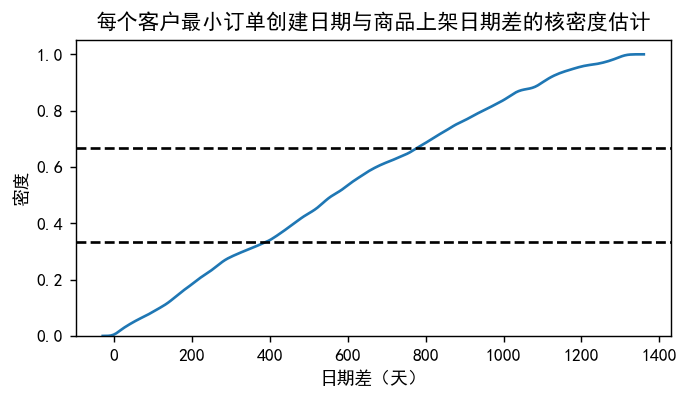

In [60]:
# 绘制核密度估计图
plt.figure(figsize=(6, 3),dpi=128)
sns.kdeplot(b['日期差'], bw_adjust=0.5,cumulative=True)
plt.title('每个客户最小订单创建日期与商品上架日期差的核密度估计')
plt.axhline(y=0.334, color='k', linestyle='--')
plt.axhline(y=0.667, color='k', linestyle='--')
#plt.axhline(y=0.5, color='k', linestyle='--')
plt.xlabel('日期差（天）')
plt.ylabel('密度')
plt.show()

In [61]:
#很平滑，就用三分位数进行划分
b['新品接受度']=pd.qcut(b['日期差'], q=3, labels=['低', '中', '高'])
customers_new = pd.merge(customers_new, 
                         b.groupby('客户id')['新品接受度'].apply(lambda x: x.mode().iloc[0]).reset_index()
                          , on='客户id', how='left')

In [62]:
customers_new['新品接受度'].value_counts()

低    37478
高    29466
中    27943
Name: 新品接受度, dtype: int64

# 综合价值

### 门店价值

In [63]:
#采购金额，采购频次，工业毛利额

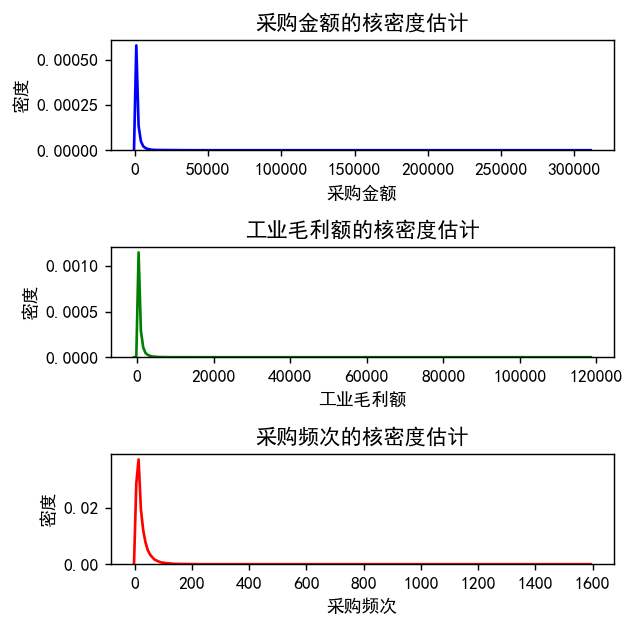

In [64]:
fig, axs = plt.subplots(3, 1, figsize=(5, 5),dpi=128)

sns.kdeplot(customers_new['采购金额'], ax=axs[0], color='blue', bw_adjust=0.5)
axs[0].set_title('采购金额的核密度估计')
axs[0].set_xlabel('采购金额')
axs[0].set_ylabel('密度')

sns.kdeplot(customers_new['工业毛利额'], ax=axs[1], color='green', bw_adjust=0.5)
axs[1].set_title('工业毛利额的核密度估计')
axs[1].set_xlabel('工业毛利额')
axs[1].set_ylabel('密度')

sns.kdeplot(customers_new['采购频次'], ax=axs[2], color='red', bw_adjust=0.5)
axs[2].set_title('采购频次的核密度估计')
axs[2].set_xlabel('采购频次')
axs[2].set_ylabel('密度')

plt.tight_layout()

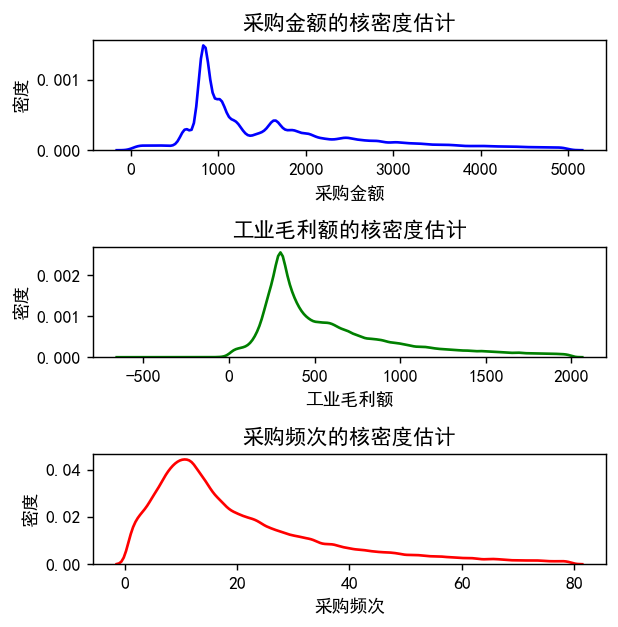

In [65]:
#极大值太多了，去掉然后画图
fig, axs = plt.subplots(3, 1, figsize=(5, 5),dpi=128)
sns.kdeplot(customers_new[customers_new['采购金额'] < 5000]['采购金额'], ax=axs[0], color='blue', bw_adjust=0.5)
axs[0].set_title('采购金额的核密度估计')
axs[0].set_xlabel('采购金额')
axs[0].set_ylabel('密度')

sns.kdeplot(customers_new[customers_new['工业毛利额']< 2000]['工业毛利额'], ax=axs[1], color='green', bw_adjust=0.5)
axs[1].set_title('工业毛利额的核密度估计')
axs[1].set_xlabel('工业毛利额')
axs[1].set_ylabel('密度')

sns.kdeplot(customers_new[customers_new['采购频次']<80]['采购频次'], ax=axs[2], color='red', bw_adjust=0.5)
axs[2].set_title('采购频次的核密度估计')
axs[2].set_xlabel('采购频次')
axs[2].set_ylabel('密度')

plt.tight_layout()

In [66]:
print(customers_new['采购金额'].quantile([0,0.25, 0.5, 0.75,1]),end='\n')
print(customers_new['工业毛利额'].quantile([0,0.25, 0.5, 0.75,1]),end='\n')
print(customers_new['采购频次'].quantile([0,0.25, 0.5, 0.75,1]),end='\n')

0.00         0.020000
0.25       870.500020
0.50      1462.800085
0.75      2609.835036
1.00    310757.670000
Name: 采购金额, dtype: float64
0.00      -592.190002
0.25       302.229000
0.50       476.390000
0.75       883.043530
1.00    118339.835000
Name: 工业毛利额, dtype: float64
0.00       1.0
0.25       9.0
0.50      16.0
0.75      29.0
1.00    1590.0
Name: 采购频次, dtype: float64


In [67]:
#划分为四分位数，分别映射为
customers_门店价值=customers_new[['客户id','采购金额','工业毛利额','采购频次']].copy().dropna(subset=['采购金额'])
customers_门店价值['采购金额数值']=pd.qcut(customers_new['采购金额'], q=4, labels=[0.25, 0.5, 0.75, 1])
customers_门店价值['工业毛利额数值']=pd.qcut(customers_new['工业毛利额'], q=4, labels=[0.25, 0.5, 0.75, 1])
customers_门店价值['采购频次数值']=pd.qcut(customers_new['采购频次'], q=4, labels=[0.25, 0.5, 0.75, 1])
customers_门店价值['门店价值求和']=customers_门店价值.filter(like='数值').sum(axis=1)#.value_counts()

customers_门店价值['门店价值'] = pd.cut(customers_门店价值['门店价值求和'], bins=[0, 2, 2.8, 3], labels=['低价值', '一般价值', '高价值'])
#customers_门店价值['门店价值'] =pd.qcut(customers_门店价值['门店价值求和'], q=3, labels=['低价值','一般价值','高价值'])#.value_counts()

In [68]:
customers_门店价值['门店价值'].value_counts(normalize=True)

低价值     0.581038
一般价值    0.234110
高价值     0.184851
Name: 门店价值, dtype: float64

In [69]:
def check_门店价值(q=4):
    customers_门店价值=customers_new[['客户id','采购金额','工业毛利额','采购频次']].copy().dropna(subset=['采购金额'])
    for column in ['采购金额', '工业毛利额', '采购频次']:
        customers_门店价值[f'{column}数值'] = pd.qcut(customers_new[column], q=q, labels=[i/q for i in range(1, q+1)])
    customers_门店价值['门店价值求和']=customers_门店价值.filter(like='数值').sum(axis=1)#.value_counts()

    #customers_门店价值['门店价值'] =pd.qcut(customers_门店价值['门店价值求和'], q=3, labels=['低价值','一般价值','高价值'])#.value_counts()
    customers_门店价值['门店价值'] = pd.cut(customers_门店价值['门店价值求和'], bins=[0, 2, 2.8, 3], labels=['低价值', '一般价值', '高价值'])
    return customers_门店价值[['客户id','门店价值']]

for q in range(3,15):
    print(f'当q={q}')
    print(check_门店价值(q=q)['门店价值'].value_counts()) 

当q=3
低价值     57723
高价值     23744
一般价值    13420
Name: 门店价值, dtype: int64
当q=4
低价值     55133
一般价值    22214
高价值     17540
Name: 门店价值, dtype: int64
当q=5
低价值     58805
一般价值    22317
高价值     13765
Name: 门店价值, dtype: int64
当q=6
低价值     60040
一般价值    20388
高价值     14459
Name: 门店价值, dtype: int64
当q=7
低价值     60295
一般价值    22321
高价值     12271
Name: 门店价值, dtype: int64
当q=8
低价值     61014
一般价值    23199
高价值     10674
Name: 门店价值, dtype: int64
当q=9
低价值     61584
一般价值    23891
高价值      9412
Name: 门店价值, dtype: int64
当q=10
低价值     61894
一般价值    24551
高价值      8442
Name: 门店价值, dtype: int64
当q=11
低价值     62275
一般价值    22595
高价值     10017
Name: 门店价值, dtype: int64
当q=12
低价值     62352
一般价值    23420
高价值      9115
Name: 门店价值, dtype: int64
当q=13
低价值     62629
一般价值    23754
高价值      8504
Name: 门店价值, dtype: int64
当q=14
低价值     62824
一般价值    24118
高价值      7945
Name: 门店价值, dtype: int64


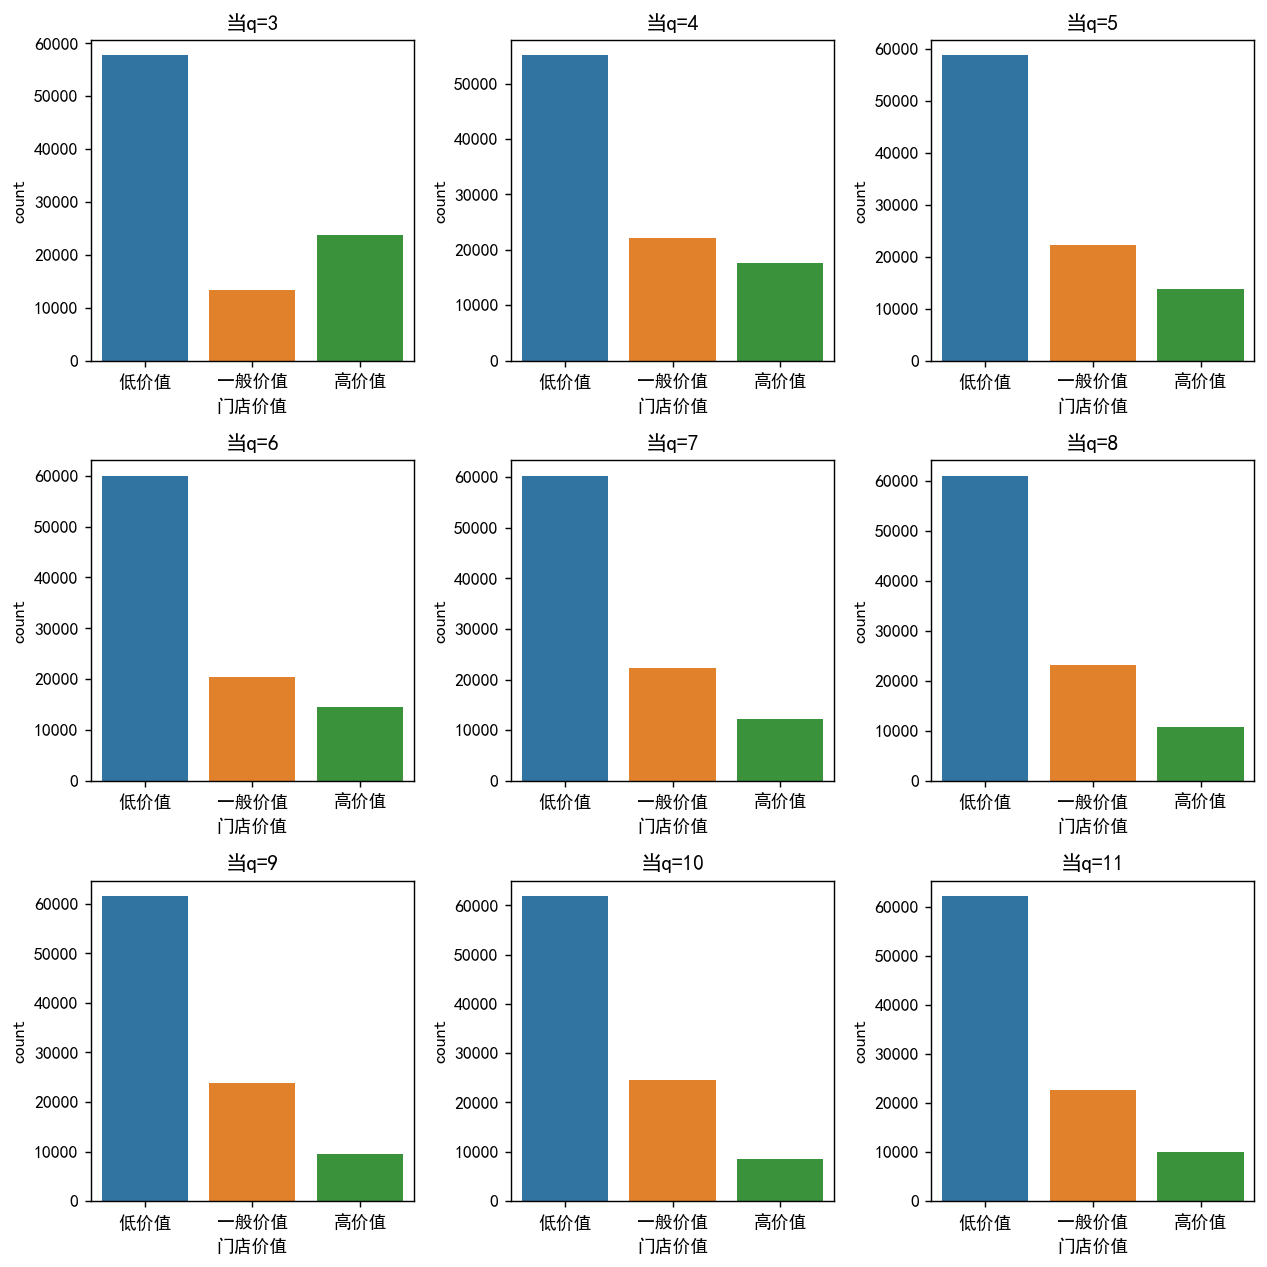

In [70]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10),dpi=128)
# 设置每个子图的标题和y轴标签
for i, q in enumerate(range(3, 12)):
    ax = axes[i // 3, i % 3]  # 获取当前子图的坐标
    ax.set_title(f'当q={q}')
    ax.set_ylabel('Count')
    sns.countplot(x='门店价值', data=check_门店价值(q=q), ax=ax)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

In [71]:
#q=10的时候比较符合要求，差不多是6:3:1
#合并结果
customers_new = pd.merge(customers_new, 
                         check_门店价值(q=10)
                          , on='客户id', how='left')

### RFM分级
（<font color='red'>之前修改过</font>）


In [72]:
#采购金额，采购频次，最后一次采购间隔,满意度

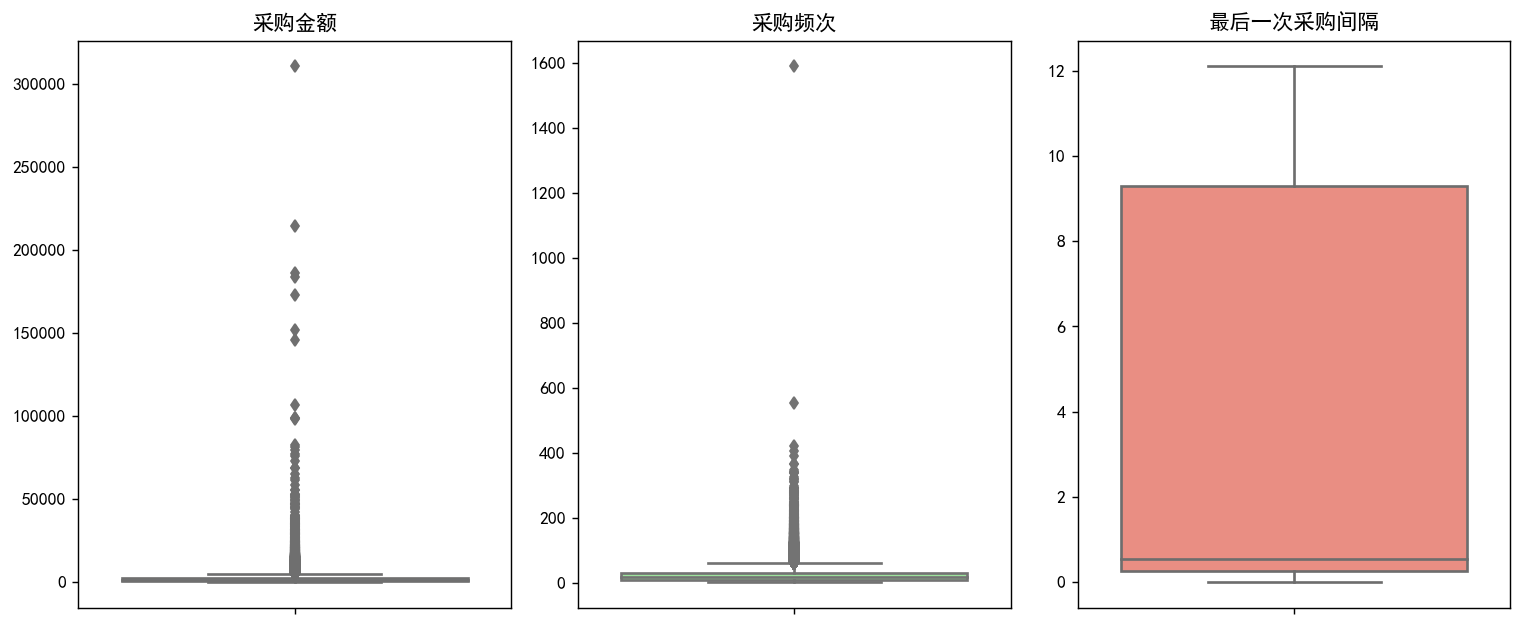

In [73]:
# 绘制1*3的多子图箱线图
fig, axs = plt.subplots(1, 3, figsize=(12, 5),dpi=128)

sns.boxplot(y=customers_new['采购金额'], ax=axs[0], color='skyblue')
axs[0].set_title('采购金额')
axs[0].set_ylabel('')

sns.boxplot(y=customers_new['采购频次'], ax=axs[1], color='lightgreen')
axs[1].set_title('采购频次')
axs[1].set_ylabel('')

sns.boxplot(y=customers_new['最后一次采购间隔'], ax=axs[2], color='salmon')
axs[2].set_title('最后一次采购间隔')
axs[2].set_ylabel('')

plt.tight_layout()
plt.show()

#### 聚类思路

In [74]:
customers_FRM=customers_new[['客户id','采购金额','采购频次','最后一次采购间隔']].copy()#.dropna(subset=['采购金额'])
#customers_FRM['满意度']=1-customers_new['退货率']
customers_FRM=customers_FRM.dropna(subset=['采购金额'])
data=customers_FRM.copy().set_index('客户id')

In [75]:
# 假定R指标为'最后一次采购间隔'
R = data['最后一次采购间隔']
# 正向指标为F、M、S，分别对应'采购频次'、'采购金额'、'满意度'
F = data['采购频次']
M = data['采购金额']
#S = data['满意度']
# R指标标准化
R_std = (R.max() - R) / (R.max() - R.min())
# F、M、S指标标准化
F_std = (F - F.min()) / (F.max() - F.min())
M_std = (M - M.min()) / (M.max() - M.min())
#S_std = (S - S.min()) / (S.max() - S.min())

data_std = pd.DataFrame({'R_std': R_std, 'F_std': F_std,'M_std': M_std},index=customers_FRM['客户id'])
# 计算信息熵
k = 1 / np.log(len(data))
data_pro = data_std.div(data_std.sum(axis=0), axis=1)
data_entropy = -k * (data_pro * np.log(data_pro)).sum()
data_entropy = data_entropy.replace(-np.inf, 0)
g = 1 - data_entropy
weight = g / g.sum()
data_updated = data_std.mul(weight, axis=1)
data_updated.head()

,R_std,F_std,M_std
客户id,,,
6970904116784796290,0.170576,0.000766,0.002639
6970904089375019075,0.012319,0.001532,0.002221
6970903995691045348,0.165364,0.010721,0.005556
6970904028175929760,0.158256,0.003063,0.001107
6970904139153019784,0.163469,0.000000,0.001419


In [76]:
# 使用KMeans进行聚类，将数据分为3类
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_updated)
clusters = kmeans.labels_
data_updated['Cluster'] = clusters

cluster_centers = kmeans.cluster_centers_
cluster_scores = cluster_centers.sum(axis=1)

cluster_mapping = pd.Series(cluster_scores, index=np.arange(0, len(cluster_scores))).sort_values(ascending=False)
value_labels = {cluster_mapping.index[0]: '重要客户',
                cluster_mapping.index[1]: '重要客户',
                cluster_mapping.index[2]: '重要客户',
                cluster_mapping.index[3]: '一般客户',
                cluster_mapping.index[4]: '一般客户',
                cluster_mapping.index[5]: '一般客户',
                cluster_mapping.index[6]: '不重要客户',
                cluster_mapping.index[7]: '不重要客户',
                cluster_mapping.index[8]: '不重要客户',
                cluster_mapping.index[9]: '不重要客户'}

data_updated['FRM等级'] = data_updated['Cluster'].map(value_labels)
data_updated[['R_std', 'F_std', 'M_std', 'Cluster', 'FRM等级']].head()

,R_std,F_std,M_std,Cluster,FRM等级
客户id,,,,,
6970904116784796290,0.170576,0.000766,0.002639,8,一般客户
6970904089375019075,0.012319,0.001532,0.002221,2,不重要客户
6970903995691045348,0.165364,0.010721,0.005556,0,一般客户
6970904028175929760,0.158256,0.003063,0.001107,6,一般客户
6970904139153019784,0.163469,0.000000,0.001419,6,一般客户


In [77]:
data_updated.groupby('Cluster').mean()

,R_std,F_std,M_std
Cluster,,,
0,0.168088,0.009527,0.004740
1,0.024341,0.003363,0.001729
2,0.010206,0.002789,0.001553
3,0.169829,0.037411,0.022856
4,0.036447,0.003889,0.001914
5,0.169723,0.079332,0.188886
6,0.160618,0.003890,0.002081
7,0.168698,0.018967,0.009761
8,0.167693,0.003112,0.001875


In [78]:
data_updated['FRM等级'].value_counts()

一般客户     62481
不重要客户    25436
重要客户      6970
Name: FRM等级, dtype: int64

不是很可控，勉强弄成这个比例

#### 阈值划分思路

| 类别     | 客户名称   | 采购金额 | 采购频次 | 最后一次采购间隔 |
|----------|------------|-----------|----------|-----------------|
| 高-高-高 | 重要保持客户 | 高        | 高       | 高              |
| 高-低-高 | 重要价值客户 | 高        | 低       | 高              |
| 低-低-高 | 重要发展客户 | 低        | 低       | 高              |
| 高-高-低 | 重要挽留客户 | 高        | 高       | 低              |
| 低-高-高 | 一般重要客户 | 低        | 高       | 高              |
| 高-低-低 | 一般客户    | 高        | 低       | 低              |
| 低-高-低 | 一般挽留客户 | 低        | 高       | 低              |
| 低-低-低 | 无价值客户  | 低        | 低       | 低              |

这里的 采购间隔‘高’不是指 数值大，是指这个特征表现好，即最后一次采购间隔时间短

In [79]:
customers_FRM=customers_new[['客户id','采购金额','采购频次','最后一次采购间隔']].copy()#.dropna(subset=['采购金额'])
#customers_FRM['满意度']=1-customers_new['退货率']
customers_FRM=customers_FRM.dropna(subset=['采购金额'])
customers_FRM['最后一次采购间隔']=-customers_FRM['最后一次采购间隔']  #直接取负数就行，这样就是数值越大特征表现越好，即：高
df=customers_FRM.copy().set_index('客户id')
df.head()

,采购金额,采购频次,最后一次采购间隔
客户id,,,
6970904116784796290,1941.60000,4.0,-0.100000
6970904089375019075,1634.10000,7.0,-11.233333
6970903995691045348,4087.50001,43.0,-0.466667
6970904028175929760,814.58000,13.0,-0.966667
6970904139153019784,1044.00000,1.0,-0.600000


In [80]:
df['采购金额分箱'] = pd.qcut(df['采购金额'], q=3, labels=['低','中', '高']).map({'中':"低",'低':'低','高':"高"})
df['采购频次分箱'] = pd.qcut(df['采购频次'], q=3, labels=['低','中', '高']).map({'中':"低",'低':'低','高':"高"})
df['最后一次采购间隔分箱'] = pd.qcut(df['最后一次采购间隔'], q=3, labels=['低','中', '高']).map({'中':"低",'低':'低','高':"高"})

# 映射客户类型
def map_customer_type(row):
    mapping = {
        ('高', '高', '高'): '重要保持客户',
        ('高', '低', '高'): '重要价值客户',
        ('低', '低', '高'): '重要发展客户',
        ('高', '高', '低'): '重要挽留客户',
        ('低', '高', '高'): '一般重要客户',
        ('高', '低', '低'): '一般客户',
        ('低', '高', '低'): '一般挽留客户',
        ('低', '低', '低'): '无价值客户'
    }
    return mapping.get((row['采购金额分箱'], row['采购频次分箱'], row['最后一次采购间隔分箱']), '未知')

df['客户类型'] = df.apply(map_customer_type, axis=1)

df.drop(['采购金额分箱', '采购频次分箱', '最后一次采购间隔分箱'], axis=1, inplace=True)
df.head()

,采购金额,采购频次,最后一次采购间隔,客户类型
客户id,,,,
6970904116784796290,1941.60000,4.0,-0.100000,重要发展客户
6970904089375019075,1634.10000,7.0,-11.233333,无价值客户
6970903995691045348,4087.50001,43.0,-0.466667,重要挽留客户
6970904028175929760,814.58000,13.0,-0.966667,无价值客户
6970904139153019784,1044.00000,1.0,-0.600000,无价值客户


In [81]:
df['客户类型'].value_counts()

无价值客户     46730
重要保持客户    13401
重要挽留客户    11450
重要发展客户    11258
一般客户       4338
一般挽留客户     3802
重要价值客户     2440
一般重要客户     1468
Name: 客户类型, dtype: int64

In [82]:
customers_new = pd.merge(customers_new, data_updated['FRM等级'].reset_index()  #data_updated['FRM等级'].reset_index()
                          , on='客户id', how='left')

### 门店类别
（<font color='red'>修改过</font>）

<AxesSubplot:ylabel='Density'>

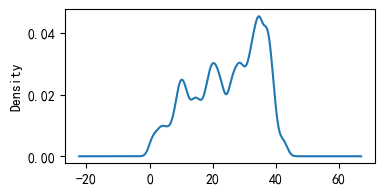

In [83]:
customers_类别=customers_new[['客户id','注册时长','采购金额','最后一次采购间隔','采购频次']].copy().dropna(subset=['最后一次采购间隔'])
customers_类别['注册时长'].plot.kde(figsize=(4,2))

In [84]:
customers_类别['注册时长'].describe()

count    94887.000000
mean        24.737640
std         10.759193
min          0.033333
25%         16.366667
50%         26.600000
75%         34.166667
max         44.700000
Name: 注册时长, dtype: float64

In [85]:
## 选20%的店铺作为新店铺，差不多是一年
#n1=customers_类别['注册时长'].quantile([0.2]).to_numpy()
##改成第一次采购间隔均值
n1=customers_new['第一次采购间隔'].mean()

In [86]:
c1=customers_类别[customers_类别['注册时长'] > n1]; c_新门店=customers_类别[~(customers_类别['注册时长'] > n1)]
c_新门店['门店类别']='新门店'
print(c1.shape,c_新门店.shape)

(67699, 5) (27188, 6)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

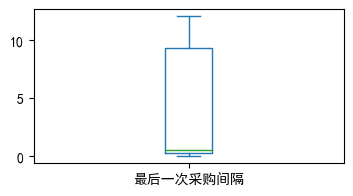

In [87]:
c1['最后一次采购间隔'].plot.box(figsize=(4,2))

In [88]:
#### 分布比较均匀，可以取均值
c_活跃=c1[c1['最后一次采购间隔']<c1['最后一次采购间隔'].mean()]  ;  c_不活跃=c1[c1['最后一次采购间隔']>c1['最后一次采购间隔'].mean()] 
print(c_活跃.shape,c_不活跃.shape)

(48846, 5) (18853, 5)


<AxesSubplot:ylabel='Density'>

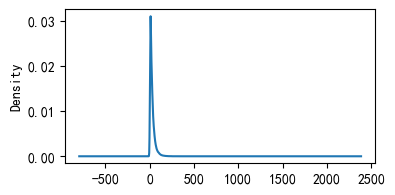

In [89]:
c_活跃['采购频次'].plot.kde(figsize=(4,2))

<AxesSubplot:ylabel='Density'>

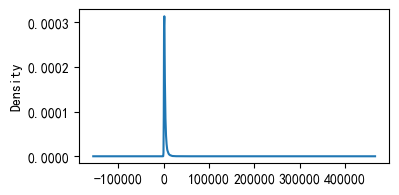

In [90]:
c_活跃['采购金额'].plot.kde(figsize=(4,2))

<AxesSubplot:>

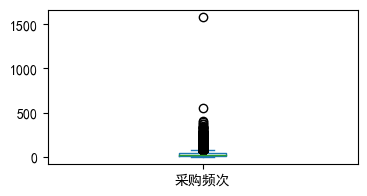

In [91]:
#偏态很严重，画箱线图看
c_活跃['采购频次'].plot.box(figsize=(4,2))

<AxesSubplot:>

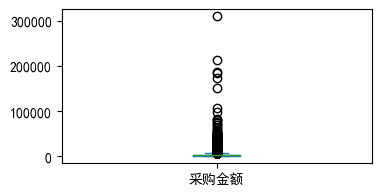

In [92]:
c_活跃['采购金额'].plot.box(figsize=(4,2))

In [93]:
#### 分布不是很均匀，取（为了精简核心门店的数量，取80%分位数吧）
median_purchase_freq = c_活跃['采购频次'].quantile([0.8]).to_numpy()
median_purchase_amount = c_活跃['采购金额'].quantile([0.8]).to_numpy()

# 添加新列并根据条件打标
def label_store(row):
    if row['采购频次'] > median_purchase_freq and row['采购金额'] > median_purchase_amount:
        return '核心门店'
#     elif row['采购频次'] < median_purchase_freq and row['采购金额'] < median_purchase_amount:
#         return '普通门店'
    else:
        return '普通门店'

# 应用自定义函数
c_活跃['门店类别'] = c_活跃.apply(label_store, axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [94]:
c_活跃['门店类别'].value_counts()

普通门店    41361
核心门店     7485
Name: 门店类别, dtype: int64

<AxesSubplot:>

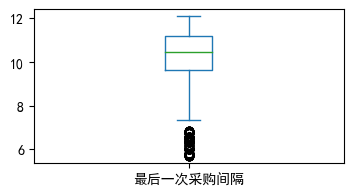

In [95]:
c_不活跃['最后一次采购间隔'].plot.box(figsize=(4,2))

<AxesSubplot:ylabel='Density'>

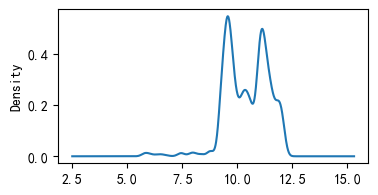

In [96]:
c_不活跃['最后一次采购间隔'].plot.kde(figsize=(4,2))

In [97]:
c_不活跃['最后一次采购间隔'].median() #取中位数很合适，10附近正好有2个高峰

10.466666666666667

In [98]:
median_last_purchase_interval = c_不活跃['最后一次采购间隔'].median()

# 添加新列并根据条件打标
def label_store_type(row):
    if row['最后一次采购间隔'] < median_last_purchase_interval:
        return '睡眠门店'
    else:
        return '流失门店'

# 应用自定义函数
c_不活跃['门店类别'] = c_不活跃.apply(label_store_type, axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [99]:
#合并
pd.concat([c_不活跃,c_活跃,c_新门店],axis=0)['门店类别'].value_counts()

普通门店    41361
新门店     27188
流失门店     9516
睡眠门店     9337
核心门店     7485
Name: 门店类别, dtype: int64

In [100]:
customers_new = pd.merge(customers_new, pd.concat([c_不活跃,c_活跃,c_新门店],axis=0)[['客户id','门店类别']]
                                        , on='客户id', how='left')

### 储存

In [101]:
customers_new.dropna(subset=['下单日期偏好']).to_csv('新特征_300w样表.csv',index=False)

In [103]:
customers_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226401 entries, 0 to 226400
Data columns (total 50 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   客户id       226401 non-null  object  
 1   门店类型       226401 non-null  object  
 2   行政区划       226401 non-null  object  
 3   注册时长       226401 non-null  float64 
 4   第一次采购间隔    94887 non-null   float64 
 5   采购金额       94887 non-null   float64 
 6   月均实付金额     94887 non-null   float64 
 7   平均折扣率      94887 non-null   float64 
 8   折扣订单占比     94887 non-null   float64 
 9   最大采购金额     94887 non-null   float64 
 10  最小采购金额     94887 non-null   float64 
 11  客盒数        94887 non-null   float64 
 12  客品数        94887 non-null   float64 
 13  sku数       94887 non-null   float64 
 14  客单价        94887 non-null   float64 
 15  品单价        94887 non-null   float64 
 16  客户毛利额      94887 non-null   float64 
 17  客户毛利率      94887 non-null   float64 
 18  工业毛利额      94887 non-null   float64 
 19  工业

In [104]:
#w

In [105]:
customers_new[~customers_new['一单一品率'].isna()].head()

,客户id,门店类型,行政区划,注册时长,第一次采购间隔,采购金额,月均实付金额,平均折扣率,折扣订单占比,最大采购金额,...,付款方式,下单日期偏好,下单时间偏好,一单一品率,价格带,退货率,新品接受度,门店价值,FRM等级,门店类别
1,6970904116784796290,卫生服务站,县,35.433333,34.733333,1941.60000,1941.600000,0.969733,0.250000,889.2,...,微信,工作日,上午,0.5,中,0.0,中,低价值,一般客户,普通门店
3,6970904089375019075,卫生服务站,村,39.800000,28.566667,1634.10000,1634.100000,0.785701,0.571429,387.5,...,微信,工作日,晚上,0.0,低,1.0,高,低价值,不重要客户,流失门店
5,6970903995691045348,卫生服务站,县,35.500000,23.866667,4087.50001,1021.875002,0.933560,0.186047,232.5,...,微信,工作日,下午,0.0,低,0.0,低,一般价值,一般客户,核心门店
12,6970904028175929760,卫生服务站,市区,35.500000,34.500000,814.58000,814.580000,0.985482,0.153846,119.8,...,微信,工作日,下午,0.0,低,0.0,高,低价值,一般客户,普通门店
13,6970904139153019784,卫生服务站,县,26.933333,26.300000,1044.00000,1044.000000,1.000000,0.000000,1044.0,...,微信,工作日,上午,1.0,低,0.0,低,低价值,一般客户,普通门店
